In [36]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')


In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [23]:
usedu.sort_values(by=['STATE', 'YEAR'])
usedu.at[0, 'ENROLL'] = 730004.0
usedu.at[0, 'AVG_READING_8_SCORE'] = 260.276441
usedu.drop(usedu[usedu['YEAR'] == 2016].index, inplace=True)
usedu.drop(usedu[usedu['YEAR'] == 2017].index, inplace=True)
usedu.interpolate(method ='linear', limit=None,inplace=True, limit_direction='both', limit_area=None, downcast=None)
usedu

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,7.300040e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,6.761740e+05,208.327876,252.187522,207.963517,260.276441
1,1992_ALASKA,ALASKA,1992,7.122181e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,1.123350e+05,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,6.944322e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,6.148810e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,6.766462e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,4.052590e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,6.588603e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4.717112e+06,208.398961,260.892247,196.764414,265.519676
5,1992_COLORADO,COLORADO,1992,6.410744e+05,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,5.626130e+05,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,6.232885e+05,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,4.369320e+05,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,6.055026e+05,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,9.629600e+04,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,5.877167e+05,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,7.000000e+04,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,5.699308e+05,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1.819706e+06,213.689751,259.908848,204.882606,262.118986


1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Yes - just looking at the boxplots, we can see there are many outliers. When I calculate the Z-scores with a threshold of 2, values are returned.

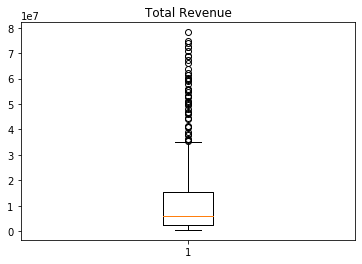

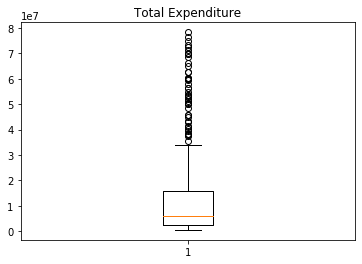

In [34]:
plt.boxplot(usedu["TOTAL_REVENUE"])
plt.title("Total Revenue")
plt.show()

plt.boxplot(usedu["TOTAL_EXPENDITURE"])
plt.title("Total Expenditure")
plt.show()

In [35]:
revenue_zscores = zscore(usedu["TOTAL_REVENUE"])
print('Total Revenue Z-score:', np.where(revenue_zscores > 2))
expenditure_zscores = zscore(usedu["TOTAL_EXPENDITURE"])
print('Total Expenditure Z-score:', np.where(expenditure_zscores > 2))

Total Revenue Z-score: (array([ 260,  311,  362,  413,  464,  492,  514,  542,  565,  593,  604,
        616,  644,  655,  667,  695,  706,  718,  746,  757,  769,  797,
        808,  820,  849,  860,  874,  903,  914,  926,  955,  966,  979,
       1007, 1018, 1030, 1058, 1069, 1081, 1109, 1120, 1132, 1160, 1171,
       1183, 1211, 1222], dtype=int32),)
Total Expenditure Z-score: (array([ 311,  362,  413,  464,  492,  514,  542,  553,  565,  593,  604,
        616,  644,  655,  667,  695,  706,  718,  746,  757,  769,  797,
        808,  820,  849,  860,  874,  903,  914,  926,  955,  966,  979,
       1007, 1018, 1030, 1058, 1069, 1081, 1109, 1120, 1132, 1160, 1171,
       1183, 1211, 1222], dtype=int32),)


2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

Using the winsorize() function, I was able to limit the values of the outliers. When I plot the new data, we can see there are no outliers.

In [38]:
winsorized_revenue = winsorize(usedu["TOTAL_REVENUE"], (0, 0.10))
winsorized_expenditure = winsorize(usedu["TOTAL_EXPENDITURE"], (0, 0.10))

print(winsorized_revenue)
print(winsorized_expenditure)

[ 2678885.  1049591.  3258079. ... 23766529. 23766529. 23766529.]
[ 2653798.   972488.  3401580. ... 23352516. 23352516. 23352516.]


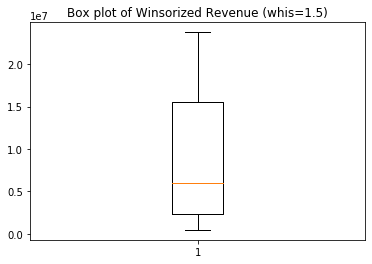

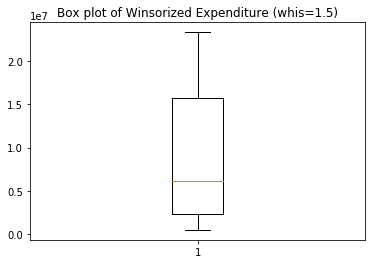

In [39]:
plt.boxplot(winsorized_revenue)
plt.title("Box plot of Winsorized Revenue (whis=1.5)")
plt.show()

plt.boxplot(winsorized_expenditure)
plt.title("Box plot of Winsorized Expenditure (whis=1.5)")
plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

There appear to be many outliers, to the point that I feel it does a disservice to the data to eliminate them. I'll drop the four most egregious datapoints as they seem to be outliers even compared to the outliers. I attempted to transform the outliers using a log transformation, but was unable to plot the results using a boxplot - it just showed an empty box. Instead, I'll windsorize the remaining outliers to 10% on either side. 


{'whiskers': [<matplotlib.lines.Line2D at 0xc6987d0>,
 'caps': [<matplotlib.lines.Line2D at 0x6b73bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc698e10>],
 'medians': [<matplotlib.lines.Line2D at 0x6b73290>],
 'fliers': [<matplotlib.lines.Line2D at 0x6b73fb0>],
 'means': []}

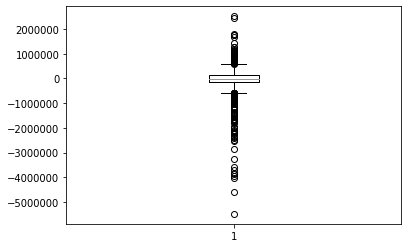

In [81]:
usedu['REMAINDER'] = usedu['TOTAL_REVENUE'] - usedu['TOTAL_EXPENDITURE']
plt.boxplot(usedu['REMAINDER'])



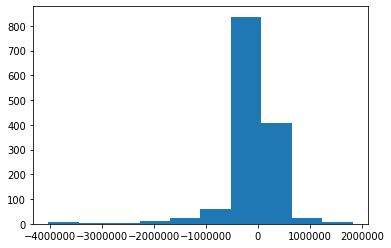

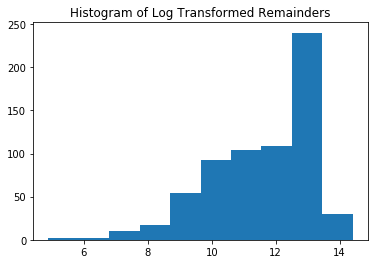

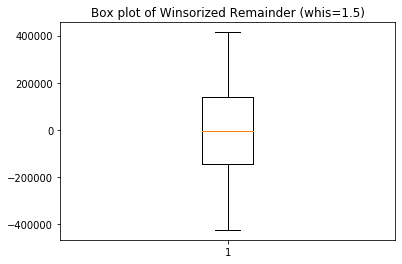

In [86]:
no_remainder_outliers = usedu.drop(usedu[(usedu.REMAINDER < -4500000) | (usedu.REMAINDER > 2000000)].index)

plt.hist(no_remainder_outliers['REMAINDER'])
plt.show()

plt.hist(np.log(no_remainder_outliers["REMAINDER"]))
plt.title("Histogram of Log Transformed Remainders")
plt.show()


# plt.boxplot(np.log(no_remainder_outliers["REMAINDER"]))
# plt.title("Box plot of log transformed remainders")
# plt.show()

winsorized_remainder = winsorize(no_remainder_outliers["REMAINDER"], (0.10, 0.10))

plt.boxplot(winsorized_remainder)
plt.title("Box plot of Winsorized Remainder (whis=1.5)")
plt.show()

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

While there are still outliers, they're not nearly as far from the mean as the original variable we created using expenditure and revenue. I was able to remove the outliers by winsorizing to 5% both sides.

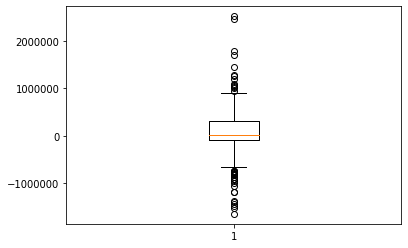

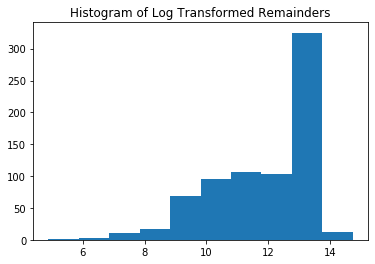

{'whiskers': [<matplotlib.lines.Line2D at 0xb055130>,
 'caps': [<matplotlib.lines.Line2D at 0xb0456d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb045a10>],
 'medians': [<matplotlib.lines.Line2D at 0xb020330>],
 'fliers': [<matplotlib.lines.Line2D at 0xb020bf0>],
 'means': []}

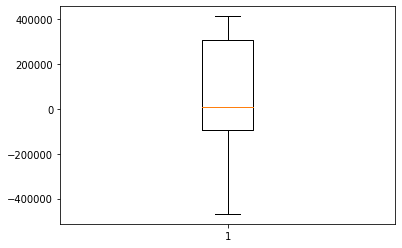

In [89]:
usedu['WINDSORIZED_REVENUE'] = winsorized_revenue
usedu['WINDSORIZED_EXPENDITURE'] = winsorized_expenditure
usedu['WINDSORIZED_REMAINDER'] = usedu['WINDSORIZED_REVENUE'] - usedu['WINDSORIZED_EXPENDITURE']

plt.boxplot(usedu['WINDSORIZED_REMAINDER'])
plt.show()

plt.hist(np.log(usedu["WINDSORIZED_REMAINDER"]))
plt.title("Histogram of Log Transformed Remainders")
plt.show()

plt.boxplot(winsorize(usedu['WINDSORIZED_REMAINDER'], (0.05, 0.05)))

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

Ths numbers make sense to me for the most part. The standard deviation (variance) is lower in the windsorized variable and the minimum is higher, closer to the mean. The 25% quartile is higher and 75% quartile is lower (again, closer to the central tendency) in the windsorized variable. However, the max values stayed the same - I'm not sure why this is.

In [93]:
pd.set_option('float_format', '{:f}'.format)
print('Remainder Stats: ', usedu['REMAINDER'].describe())
print('Windsorized Remainder Stats: ', usedu['WINDSORIZED_REMAINDER'].describe())

Remainder Stats:  count       1390.000000
mean      -52719.580216
std       558650.707521
min     -5487742.000000
25%      -148335.750000
50%        -5620.500000
75%       141866.000000
max      2520706.000000
Name: REMAINDER, dtype: float64
Windsorized Remainder Stats:  count       1390.000000
mean       51768.767266
std       335198.405777
min     -1650831.000000
25%       -94114.000000
50%         8903.500000
75%       308306.000000
max      2520706.000000
Name: WINDSORIZED_REMAINDER, dtype: float64


6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

This is a really interesting question. Originally I thought I would normalize after, because you lose important information by dealing with the outliers beforehand. However, after further discussion, I think I would handle the outliers before because it gives you a sense of spending proportions.